In [34]:
import os
import tensorflow as tf

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [36]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from google.colab import drive

In [37]:
import matplotlib.pyplot as plt


In [38]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# Define Dataset Path
dataset_path = "/content/drive/My Drive/Eye fatigue/train"


In [40]:
# Check Dataset
print("Classes:", os.listdir(dataset_path))

Classes: ['Closed', 'working', 'expression', 'Open']


In [41]:
img_size = (128, 128)
batch_size = 32

In [42]:
# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255,       # Normalize pixel values
    rotation_range=20,       # Random rotation
    zoom_range=0.2,          # Random zoom
    shear_range=0.2,         # Shear transformation
    horizontal_flip=True,    # Random horizontal flip
    validation_split=0.2     # 20% for validation
)

In [43]:
# Load Training and Validation Data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 2281 images belonging to 4 classes.


In [44]:
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 569 images belonging to 4 classes.


In [45]:
# Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')  # Number of output classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
# Callbacks for Early Stopping and Learning Rate Adjustment
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.0001
)

In [48]:
# Train the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 39s 415ms/step - accuracy: 0.5941 - loss: 5.1294 - val_accuracy: 0.2548 - val_loss: 13.0503 - learning_rate: 0.0010
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 30s 319ms/step - accuracy: 0.7144 - loss: 0.8941 - val_accuracy: 0.3779 - val_loss: 11.1967 - learning_rate: 0.0010
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 326ms/step - accuracy: 0.7359 - loss: 0.6211 - val_accuracy: 0.2636 - val_loss: 26.4213 - learning_rate: 0.0010
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 25s 319ms/step - accuracy: 0.7631 - loss: 0.6279 - val_accuracy: 0.3585 - val_loss: 10.1108 - learning_rate: 0.0010
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 25s 312ms/step - accuracy: 0.7740 - loss: 0.4824 - val_accuracy: 0.3691 - val_loss: 10.8763 - learning_rate: 0.0010
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - accuracy: 0.7555 - loss: 0.6453 - val_accuracy: 0.6081 - val_loss: 2.0985 - learning_rate: 0.0010
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 42s 330ms/step - accuracy: 0.7377 - los

In [49]:
# Save the Model
model.save('/content/eye_fatigue_model.h5')
print("Model saved at /content/eye_fatigue_model.h5")



Model saved at /content/eye_fatigue_model.h5


In [50]:
# Evaluate the Model
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 256ms/step - accuracy: 0.8088 - loss: 0.4521
Validation Accuracy: 80.49%


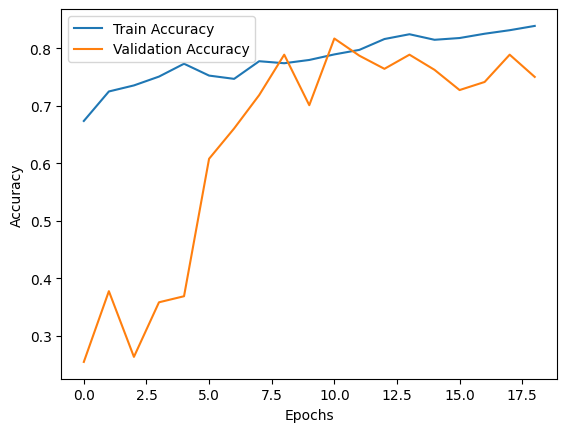

In [51]:
# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

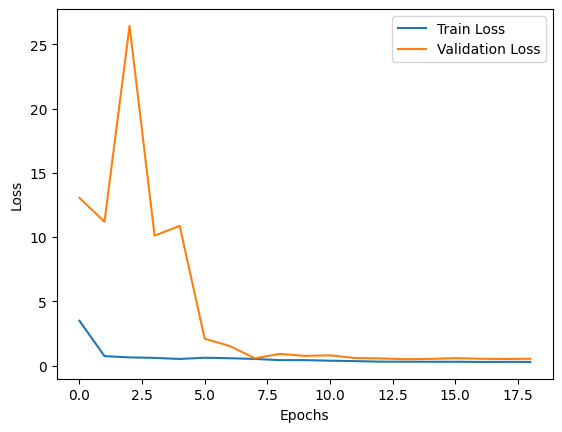

In [52]:
# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
from google.colab import files
files.download('/content/eye_fatigue_model.h5')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>